In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline


import lightgbm as lgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split


import warnings
from six.moves import urllib
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

import scipy
from scipy.stats import norm, skew

#Import the required libraries
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
#LABELS = ["Normal", "Fraud"]
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

from sklearn.manifold import TSNE

In [2]:
#data = pd.read_csv('D:/FV_raw/S01_total_rev.csv')
data = pd.read_csv('C:\\Users\\\koreaw\\비즈니스어낼리틱스\\BA_data\\S01_data_rev_1.csv')
print(data.shape)
data.head(5)

(53692, 94)


,L0t,S_NO,D_ID,Class,FV1,FV2,FV3,FV4,FV5,FV6,...,FV81,FV82,FV83,FV84,FV85,FV86,FV87,FV88,FV89,FV90
0,L001,2,5,17,0.3288,0.3603,0.5044,0.3787,0.0,0.3603,...,0.0204,0.0401,0.1349,0.0328,0.7236,0.0000,0.0000,0.5,0,0
1,L001,2,9,21,0.1288,0.2876,0.4089,0.7500,0.0,0.2876,...,0.0134,0.0355,0.1392,0.0347,0.7902,0.0000,0.0018,1.0,0,0
2,L001,2,11,9,0.0844,0.2214,0.3599,0.7500,0.0,0.2214,...,0.0885,0.1007,0.1411,0.1174,0.2804,0.0028,0.0106,1.0,0,0
3,L001,2,13,21,0.1061,0.2446,0.3740,0.7901,0.0,0.2446,...,0.0384,0.0690,0.1178,0.0518,0.6053,0.0000,0.0011,1.0,0,0
4,L001,2,25,9,0.0753,0.2145,0.3599,0.6875,0.0,0.2145,...,0.0098,0.0111,0.1147,0.0054,0.9704,0.0000,0.0000,0.5,0,0


In [4]:
data2 = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
y = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(data2)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(y.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.085121,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.099081,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.115764,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.090398,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.009193,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9


In [12]:
v=data_norm.drop('Class', axis=1).values

In [13]:
pca = PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit(v)  #주성분 분석
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수

In [14]:
num_d

18

In [15]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)

In [16]:
data2_norm2 = pd.DataFrame(new_data2)
data2_norm2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262


In [27]:
data_norm = data2_norm2.merge(y.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9


## Novelty Detection

In [28]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,17.0
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,21.0
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,9.0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,21.0
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,9.0


In [29]:
def func2(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func2, axis = 1)

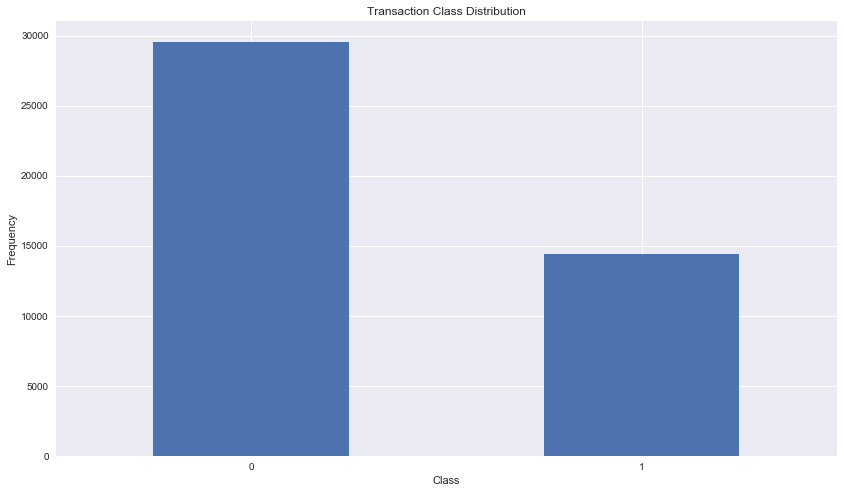

In [30]:
count_classes = pd.value_counts(data_norm1['ClassA'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [31]:
columns = data_norm1.columns.tolist()
columns = [c for c in columns if c not in ["ClassA"]]
X = data_norm1[columns]
Y=data_norm1['ClassA']

In [32]:
state = np.random.RandomState(42)
Fraud = data_norm1[data_norm1['ClassA']==1]
Valid = data_norm1[data_norm1['ClassA']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [33]:
#Fit the model


n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 18907
Accuracy Score :
0.57017823042648
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.56      0.64     29571
           1       0.40      0.59      0.47     14417

    accuracy                           0.57     43988
   macro avg       0.57      0.57      0.55     43988
weighted avg       0.62      0.57      0.58     43988

Local Outlier Factor: 22439
Accuracy Score :
0.4898836046194417
Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     29571
           1       0.31      0.47      0.37     14417

    accuracy                           0.49     43988
   macro avg       0.49      0.48      0.47     43988
weighted avg       0.55      0.49      0.51     43988

Support Vector Machine: 13526
Accuracy Score :
0.6925070473765572
Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.

In [37]:
SEED = 2
def plot_scatter(X, y, mode='TSNE', fname='file.png'):
    if mode == 'TSNE':
        X_r = TSNE(n_components=2, random_state=SEED).fit_transform(X)
    elif mode == 'PCA':
        X_r = PCA(n_components=2, random_state=SEED).fit_transform(X)
    elif mode == 'TSVD':
        X_r = TruncatedSVD(n_components=2, random_state=SEED).fit_transform(X)
    else:
        print('[ERROR]: Please select a valid mode')
        return
        
    plt.figure(figsize=(12, 8))
    plt.scatter(X_r[np.where(y == 0), 0], X_r[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Normal')
    plt.scatter(X_r[np.where(y == 1), 0], X_r[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Abnormal')

    plt.legend(loc='best');
#    plt.savefig(name);
    plt.show();
    #layout = dict(title=f'{mode} plot')
   # fig = go.Figure(data=traces, layout=layout)
    #py.iplot(fig, filename=fname)
    #fig.show()

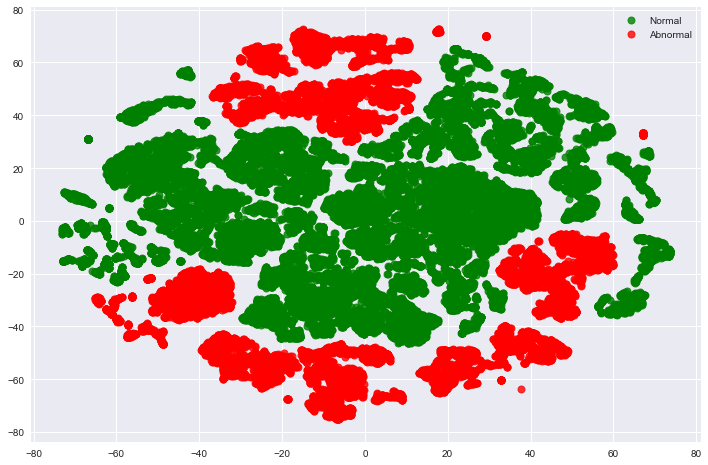

In [38]:
plot_scatter(X, Y, mode='TSNE')